In [1]:
 %matplotlib notebook

In [2]:
#------------------PCA降維-------------------------------------------------
import pandas as pd
X = pd.read_csv(r'./tfidf_min0.005_pos_matrix_0824.csv', encoding='utf-8') #0809做過
X = X.drop(['Unnamed: 0'], axis=1)
print(X.shape)

(22486, 24)


In [3]:
# 數據標準化-------------------------------------------------
from sklearn import preprocessing

'''
preprocessing.scale()是按照列進行標準化計算，計算公式為:
(X_train[:,0]-X_train[:,0].mean())/X_train[:,0].std()
(X_train[:,0]-np.mean(X_train[:,0]))/np.std(X_train[:,0])//或者
'''
X_scaled = preprocessing.scale(X)  # scale操作之後的數據零均值，單位方差（方差為1）
print(X_scaled)
print('#-----------------------------------')

[[-0.08584541 -0.11406369 -0.08794423 ... -0.08755367 -0.20379691
  -0.08990736]
 [-0.08584541 -0.11406369 -0.08794423 ... -0.08755367 -0.20379691
  -0.08990736]
 [-0.08584541 -0.11406369 -0.08794423 ... -0.08755367 -0.20379691
  -0.08990736]
 ...
 [-0.08584541 -0.11406369 -0.08794423 ... -0.08755367 -0.20379691
  -0.08990736]
 [-0.08584541 -0.11406369 -0.08794423 ... -0.08755367 -0.20379691
  -0.08990736]
 [-0.08584541  5.58089608 -0.08794423 ... -0.08755367 -0.20379691
  -0.08990736]]
#-----------------------------------


In [4]:
# # 进行PCA数据降维
from sklearn.decomposition import PCA
#
# # 生成PCA实例
pca = PCA(n_components=3)  # 把维度降至3维
# # 进行PCA降维
X_pca = pca.fit_transform(X_scaled)
print(X_pca)
# # 生成降维后的dataframe
X_pca_frame = pd.DataFrame(X_pca, columns=['pca_1', 'pca_2', 'pca_3'])  # 原始数据由(30000, 7)降维至(30000, 3)
print(X_pca_frame)
# # 训练简单模型

[[-0.52308008 -0.06600922 -0.07290919]
 [ 2.32533878 -0.16587697 -1.49253315]
 [ 1.5579589  -1.94788459  0.48354634]
 ...
 [-0.52308008 -0.06600922 -0.07290919]
 [-0.52308008 -0.06600922 -0.07290919]
 [ 5.35310243 -1.89562293 -1.85368842]]
          pca_1     pca_2     pca_3
0     -0.523080 -0.066009 -0.072909
1      2.325339 -0.165877 -1.492533
2      1.557959 -1.947885  0.483546
3      3.389257  0.751624 -2.198171
4     -0.523080 -0.066009 -0.072909
...         ...       ...       ...
22481  2.198693 -3.399580 -0.564887
22482 -0.523080 -0.066009 -0.072909
22483 -0.523080 -0.066009 -0.072909
22484 -0.523080 -0.066009 -0.072909
22485  5.353102 -1.895623 -1.853688

[22486 rows x 3 columns]


In [5]:
from sklearn.cluster import KMeans
# # KMeans算法实例化，将其设置为K=10
est = KMeans(n_clusters=7)
# # 作用到降维后的数据上
est.fit(X_pca)

kmean = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
#
# # 取出聚类后的标签
kmeans_clustering_labels = pd.DataFrame(est.labels_, columns=['cluster'])  # 0-9,一共10个标签
print(kmeans_clustering_labels)
# # 生成有聚类后的dataframe
X_pca_frame = pd.concat([X_pca_frame, kmeans_clustering_labels], axis=1)
print(X_pca_frame)


       cluster
0            0
1            4
2            2
3            4
4            0
...        ...
22481        2
22482        0
22483        0
22484        0
22485        2

[22486 rows x 1 columns]
          pca_1     pca_2     pca_3  cluster
0     -0.523080 -0.066009 -0.072909        0
1      2.325339 -0.165877 -1.492533        4
2      1.557959 -1.947885  0.483546        2
3      3.389257  0.751624 -2.198171        4
4     -0.523080 -0.066009 -0.072909        0
...         ...       ...       ...      ...
22481  2.198693 -3.399580 -0.564887        2
22482 -0.523080 -0.066009 -0.072909        0
22483 -0.523080 -0.066009 -0.072909        0
22484 -0.523080 -0.066009 -0.072909        0
22485  5.353102 -1.895623 -1.853688        2

[22486 rows x 4 columns]


[0 1 1 ... 0 0 1]
19323.698249682355
calinski_harabaz_score with k=2 is 19323.698249682355
[0 1 2 ... 0 0 2]
15942.631469803655
calinski_harabaz_score with k=3 is 15942.631469803655
[0 1 2 ... 0 0 1]
23817.747701575052
calinski_harabaz_score with k=4 is 23817.747701575052
[0 3 2 ... 0 0 2]
26775.927958349454
calinski_harabaz_score with k=5 is 26775.927958349454
[0 3 2 ... 0 0 2]
24718.13490633497
calinski_harabaz_score with k=6 is 24718.13490633497
[0 6 2 ... 0 0 2]
22096.262935896404
calinski_harabaz_score with k=7 is 22096.262935896404
[0 7 4 ... 0 0 4]
23301.74670678562
calinski_harabaz_score with k=8 is 23301.74670678562
[0 3 7 ... 0 0 1]
21480.331209987122
calinski_harabaz_score with k=9 is 21480.331209987122
[0 7 4 ... 0 0 9]
21239.693910662263
calinski_harabaz_score with k=10 is 21239.693910662263


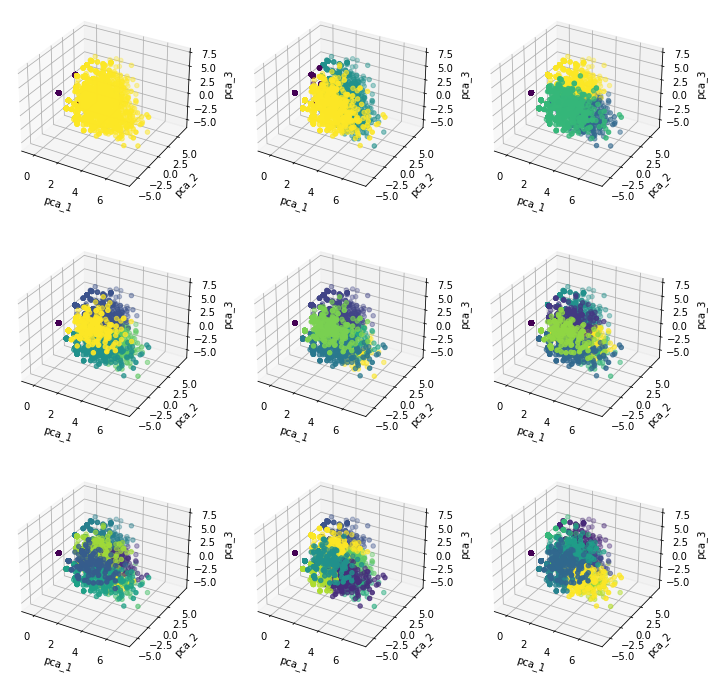

In [6]:
# #--------------------------------------------------------
# # 對不同的k值進行計算，篩選出最優的K值
from mpl_toolkits.mplot3d import Axes3D  # 绘制3D图形
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# KMeans算法實例化，將其設置為K=range(2, 14)
d = {}
fig_reduced_data = plt.figure(figsize=(12, 12))
# # 畫圖之前首先設置figure對象，此函數相當於設置一塊自定義大小的畫布，
# # 使得後面的圖形輸出在這塊規定了大小的畫布上，其中參數figsize設置畫布大小
for k in range(2, 11):
    est = KMeans(n_clusters=k, random_state=111)
# #     # 作用到降維後的數據上
    y_pred = est.fit_predict(X_pca)
    print(y_pred)
#     # 評估不同k值聚類算法效果
    calinski_harabaz_score = metrics.calinski_harabasz_score(X_pca_frame, y_pred)
    print(calinski_harabaz_score)

# # # X_pca_frame：表示要聚類的樣本數據，一般形如（samples，features）的格式。
# # # y_pred：即聚類之後得到的label標籤，形如（samples，）的格式
    d.update({k: calinski_harabaz_score})
    # print(d)
    print('calinski_harabaz_score with k={0} is {1}'.format(k, calinski_harabaz_score))
# #    CH score的數值越大越好
# # # 生成三維圖形，每個樣本點的坐標分別是三個主成分的值
    ax = plt.subplot(3, 3, k - 1,projection='3d')
# #     # 將figure設置的畫布大小分成幾個部分，表示4(row)x3(colu),即將畫布分成4x3，四行三列的12塊區域，
# # # k-1表示選擇圖形輸出的區域在第k-1塊，圖形輸出區域參數必須在“行x列”範圍
    ax.scatter(X_pca_frame.pca_1, X_pca_frame.pca_2, X_pca_frame.pca_3, c=y_pred)  # pca_1、pca_2、pca_3為輸入數據，c表示顏色序列
    ax.set_xlabel('pca_1')
    ax.set_ylabel('pca_2')
    ax.set_zlabel('pca_3')
plt.show()


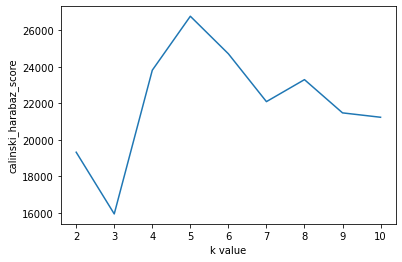

In [7]:
# #--------------------------------------------------------
# 绘制不同k值对应的score，找到最优的k值
x = []
y = []
for k, score in d.items():
    x.append(k)
    y.append(score)
# print(x)
# print(y)
plt.plot(x, y)
plt.xlabel('k value')
plt.ylabel('calinski_harabaz_score')
plt.show()

In [8]:
# #--------------------------------------------------------
X.index = X_pca_frame.index  # 返回：RangeIndex(start=0, stop=30000, step=1)
# 合并原数据和三个主成分的数据
X_full = pd.concat([X, X_pca_frame], axis=1)
X_full.to_csv(r'./kmeans_matrix_0906.csv',encoding='utf-8')
print(X_full)

       balanced    bitter  bittersweet  classic  delicious  different  dry  \
0           0.0  0.000000          0.0      0.0        0.0        0.0  0.0   
1           0.0  0.000000          0.0      0.0        0.0        0.0  0.0   
2           0.0  0.000000          0.0      0.0        1.0        0.0  0.0   
3           0.0  0.000000          0.0      0.0        0.0        0.0  0.0   
4           0.0  0.000000          0.0      0.0        0.0        0.0  0.0   
...         ...       ...          ...      ...        ...        ...  ...   
22481       0.0  0.000000          0.0      0.0        0.0        0.0  0.0   
22482       0.0  0.000000          0.0      0.0        0.0        0.0  0.0   
22483       0.0  0.000000          0.0      0.0        0.0        0.0  0.0   
22484       0.0  0.000000          0.0      0.0        0.0        0.0  0.0   
22485       0.0  0.487973          0.0      0.0        0.0        0.0  0.0   

       fresh  fruity  herbal  ...  simple      sour  strong  su

Text(0.5, 0, 'Component_3')

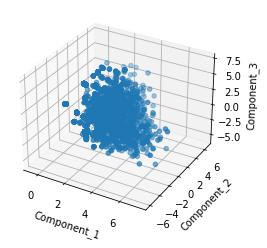

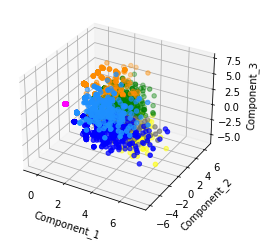

In [9]:

# #--------------------------------------------------------
# # 原始数据降维后的可视化
from mpl_toolkits.mplot3d import Axes3D

# 生成三维图形，每个样本点的坐标分别是三个主成分的值
fig_reduced_data = plt.figure()
ax_reduced_data = plt.subplot(111, projection='3d')
ax_reduced_data.scatter(X_pca_frame.pca_1.values, X_pca_frame.pca_2.values, X_pca_frame.pca_3.values)
ax_reduced_data.set_xlabel('Component_1')
ax_reduced_data.set_ylabel('Component_2')
ax_reduced_data.set_zlabel('Component_3')
# # 设置每个簇对应的颜色
cluster_2_color = {0: 'magenta', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'dimgray', 5: 'darkorange', 6: 'dodgerblue', 7: 'cadetblue',
                   8: 'firebrick', 9: 'cornsilk',10: 'brown',11: 'darkcyan',12: 'darkgoldenrod'}
colors_clustered_data = X_pca_frame.cluster.map(cluster_2_color)  # 簇名和颜色映射
fig_reduced_data = plt.figure()
ax_clustered_data = plt.subplot(111, projection='3d')
# 聚类算法之后的不同簇数据的映射为不同颜色
ax_clustered_data.scatter(X_pca_frame.pca_1.values, X_pca_frame.pca_2.values, X_pca_frame.pca_3.values,
                          c=colors_clustered_data)
ax_clustered_data.set_xlabel('Component_1')
ax_clustered_data.set_ylabel('Component_2')
ax_clustered_data.set_zlabel('Component_3')

In [10]:
# 按每个聚类分组
grouped = X_full.groupby('cluster')

result_data = pd.DataFrame()

for name, group in grouped:
    print(group)
#
    desp = group[['pca_1', 'pca_2', 'pca_3']].describe()  # 返回每组的数量、均值、标准差、最小值、最大值等数据

#  # 每组未去除异常值的个数
    print('Group:{0}, Samples before:{1}'.format(name, group['pca_1'].count()))

    for att in ['pca_1', 'pca_2', 'pca_3']:
        # 去异常值：箱形图
        lower25 = desp.loc['25%', att]
        upper75 = desp.loc['75%', att]
        IQR = upper75 - lower25
        min_value = lower25 - 1.5 * IQR
        max_value = upper75 + 1.5 * IQR
        # 使用统计中的1.5*IQR法则，删除每个聚类中的噪音和异常点
        group = group[(group[att] > min_value) & (group[att] < max_value)]
    result_data = pd.concat([result_data, group], axis=0)
     # 每组去除异常值后的个数
    print('Group:{0}, Samples after:{1}'.format(name, group['pca_1'].count()))
print('Remain sample:', result_data['pca_1'].count())

       balanced  bitter  bittersweet  classic  delicious  different  dry  \
0           0.0     0.0          0.0      0.0        0.0        0.0  0.0   
4           0.0     0.0          0.0      0.0        0.0        0.0  0.0   
5           0.0     0.0          0.0      0.0        0.0        0.0  0.0   
6           0.0     0.0          0.0      0.0        0.0        0.0  0.0   
8           0.0     0.0          0.0      0.0        0.0        0.0  0.0   
...         ...     ...          ...      ...        ...        ...  ...   
22477       0.0     0.0          0.0      0.0        0.0        0.0  0.0   
22479       0.0     0.0          0.0      0.0        0.0        0.0  0.0   
22482       0.0     0.0          0.0      0.0        0.0        0.0  0.0   
22483       0.0     0.0          0.0      0.0        0.0        0.0  0.0   
22484       0.0     0.0          0.0      0.0        0.0        0.0  0.0   

       fresh  fruity  herbal  ...  simple  sour  strong  subtle  sweet  white  \
0     

Group:0, Samples before:18197


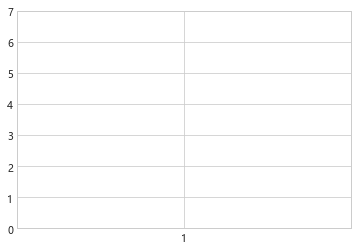

Group:1, Samples before:878


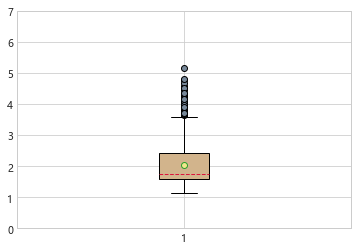

Group:2, Samples before:753


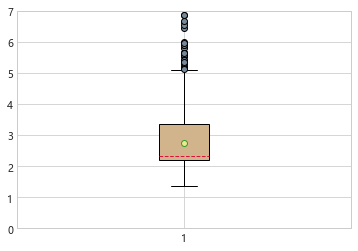

Group:3, Samples before:227


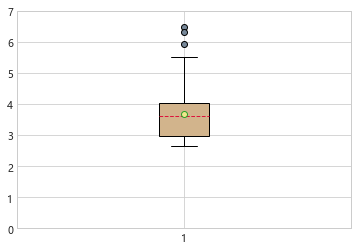

Group:4, Samples before:1132


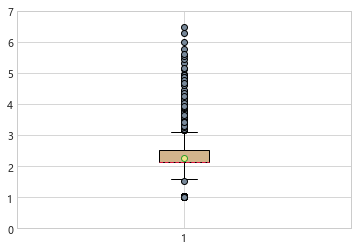

Group:5, Samples before:676


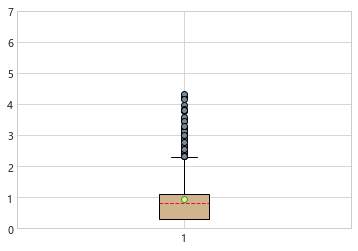

Group:6, Samples before:623


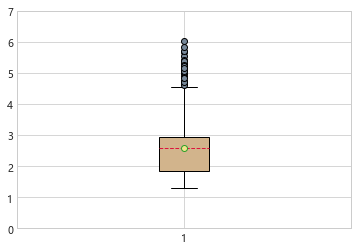

In [34]:
# print(plt.style.available) # 打印样式列表
# ['bmh', 'classic', 'dark_background', 'fast', 
# 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 
# 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid',
#  'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 
# 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks',
#  'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 
# 'tableau-colorblind10', '_classic_test']
 

# 設置圖形的顯示風格

plt.style.use('seaborn-whitegrid')

 

# 設置中文和負號正常顯示

plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'

plt.rcParams['axes.unicode_minus'] = False

 
for name, group in grouped:
    print('Group:{0}, Samples before:{1}'.format(name, group['pca_1'].count()))

# 繪圖：整體乘客的年齡箱線圖

    plt.boxplot(x = group.pca_1, # 指定繪圖數據

                patch_artist=True, # 要求用自定義顏色填充盒形圖，默認白色填充

                showmeans=True, # 以點的形式顯示均值

                boxprops = {'color':'black','facecolor':'tan'}, # 設置箱體屬性，填充色和邊框色

                flierprops = {'marker':'o','markerfacecolor':'lightslategray','color':'black'}, # 設置異常值屬性，點的形狀、填充色和邊框色

                meanprops = {'marker':'o','markerfacecolor':'khaki'}, # 設置均值點的屬性，點的形狀、填充色

                medianprops = {'linestyle':'--','color':'crimson'}) # 設置中位數線的屬性，線的類型和顏色

    # 設置y軸的範圍

    plt.ylim(0,7)



    # 去除箱線圖的上邊框與右邊框的刻度標籤

    plt.tick_params(top='off', right='off')

    # 顯示圖形

    plt.show()

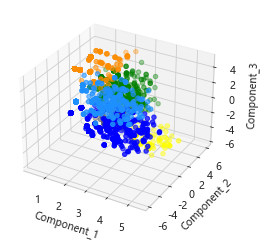

In [12]:
 # 筛选后的数据聚类可视化

colors_filtered_data = result_data.cluster.map(cluster_2_color)
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(result_data.pca_1.values, result_data.pca_2.values, result_data.pca_3.values, c=colors_filtered_data)
ax.set_xlabel('Component_1')
ax.set_ylabel('Component_2')
ax.set_zlabel('Component_3')
plt.show()
